In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import copy
import tensorflow as tf

In [19]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [34]:
roses = list(data_dir.glob('roses/*'))
image=cv2.imread(str(roses[8]))
image=cv2.resize(image,dsize=(64,64))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

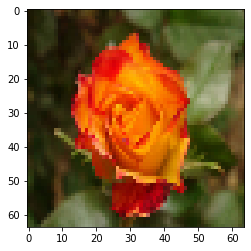

In [35]:
plt.imshow(image)

In [36]:
features = image.reshape((-1,3))
features = np.float32(features)

In [37]:
df_image=pd.DataFrame(features)
df_image

,0,1,2
0,31.0,24.0,5.0
1,27.0,25.0,4.0
2,32.0,32.0,8.0
3,31.0,34.0,7.0
4,45.0,46.0,15.0
...,...,...,...
4091,92.0,106.0,57.0
4092,90.0,103.0,51.0
4093,93.0,100.0,49.0
4094,75.0,80.0,33.0


In [38]:
def distance(x1, x2):
  return np.sqrt((np.square(np.array(x1) - np.array(x2))).sum())

In [39]:
def Estep(df,mu,r):
  N=df.shape[0]
  K=mu.shape[0]
  for i in range(0,N):
    xi=np.array(df.iloc[i])
    dist=np.zeros(K)
    for j in range(0,K):
      dist[j]=distance(xi,mu[j])
    cluster=np.argmin(dist,axis=0)
    r[i]=cluster
  return r  

In [40]:
def Mstep(df,mu,r):
  N=r.shape[0]
  K=mu.shape[0]
  mu_cnt=np.zeros(K)
  mu_temp=np.zeros((K,mu.shape[1]))
  for i in range(0,N):
    mu_cnt[(int)(r[i])]+=1.0
    mu_temp[(int)(r[i])]+=np.array(df.iloc[i])
  for i in range(0,K):
    mu_temp[i]=mu_temp[i]/mu_cnt[i]
  
  return mu_temp

In [41]:
def Convergence(mu1, mu2):
  K = mu1.shape[0]
  temp = np.zeros(K)
  for i in range(0, K):
      temp[i] = distance(mu1[i], mu2[i])
  return temp.sum()

In [42]:
def CostFn(df, mu, r):
    J = 0.0
    N = r.shape[0]
    for i in range(0, N):
        xi = np.array(df.iloc[i])
        dist = distance(xi, mu[(int)(r[i])])
        J += dist**2
    return J

In [43]:
def kMeans(df,K):
  N=df.shape[0]
  r=np.zeros(N)
  mu = np.zeros((K, df.shape[1]), dtype=np.float64)
  np.random.seed(1000000)
  for i in range(0, K):
      j = np.random.randint(0, N)
      mu[i] = np.array(df.iloc[j])
  delta = 0.000001
  prev_mu = np.zeros((K, df.shape[1]))
  iters = 0
  J = []
  while Convergence(prev_mu, mu) > delta:
    iters = iters+ 1
    
    r = Estep(df, mu, np.zeros(N))
    J.append(CostFn(df, mu, r))
    
    prev_mu = copy.deepcopy(mu)
    
    mu = Mstep(df, mu, r)
    J.append(CostFn(df, mu, r))
  return mu, r

In [44]:
def segmentImage(df,K):
  mu, r = kMeans(df, K)
  mu = np.uint8(mu)
  r=np.uint8(r)
  segmented_pixels = mu[r.flatten()]
  segmented_image = segmented_pixels.reshape((image.shape))
  return segmented_image

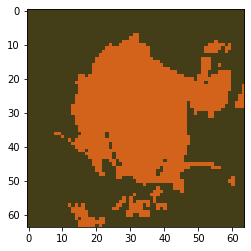

In [45]:
plt.imshow(segmentImage(df_image,2))

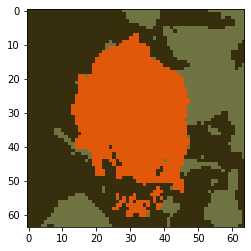

In [46]:
plt.imshow(segmentImage(df_image,3))

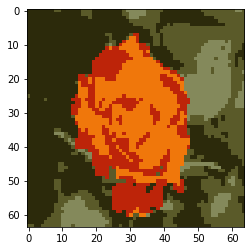

In [47]:
plt.imshow(segmentImage(df_image,5))

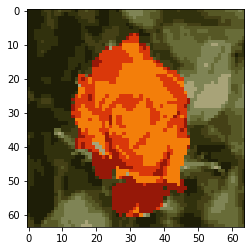

In [48]:
plt.imshow(segmentImage(df_image,10))